In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cpu')

# Dataset and data loader

In [19]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


In [20]:

bs = 64

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder("data/train/", transform=transform)
trainloader = DataLoader(train_set, batch_size=bs, shuffle=True, num_workers=4)

test_set = datasets.ImageFolder("data/test/", transform=transform)
testloader = DataLoader(test_set, batch_size=bs, shuffle=True)

# Arsitektur & config

In [21]:
from jcopdl.layers import linear_block

In [22]:

class AutoEncoder(nn.Module):
    def __init__(self, z_size):
        super().__init__()
        self.encode = nn.Sequential(
            linear_block(784, 512, batch_norm = True),
            linear_block(512, 256, batch_norm = True),
            linear_block(256, z_size, activation='sigmoid')
        )
        
        self.decode = nn.Sequential(
            linear_block(z_size, 256, batch_norm = True),
            linear_block(256, 512, batch_norm = True),
            linear_block(512, 784, activation='sigmoid')
        )
    
    def forward(self, x):
        x = self.encode(x)
        x = self.decode(x)
        return x

In [23]:
config =set_config({
    "z_size": 32,
    "batch_size":bs
})

# Training Preparation -> MCOC

In [24]:
model = AutoEncoder(config.z_size)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/ae")

# Training

In [25]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1,784).to(device)
        output = model(feature)
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3338 | Test_cost  = 0.2566 | 




Epoch     2
Train_cost  = 0.1838 | Test_cost  = 0.1734 | 




Epoch     3
Train_cost  = 0.1591 | Test_cost  = 0.1520 | 




Epoch     4
Train_cost  = 0.1450 | Test_cost  = 0.1418 | 




Epoch     5
Train_cost  = 0.1355 | Test_cost  = 0.1340 | 




Epoch     6
Train_cost  = 0.1287 | Test_cost  = 0.1278 | 




Epoch     7
Train_cost  = 0.1221 | Test_cost  = 0.1232 | 




Epoch     8
Train_cost  = 0.1172 | Test_cost  = 0.1197 | 




Epoch     9
Train_cost  = 0.1128 | Test_cost  = 0.1162 | 




Epoch    10
Train_cost  = 0.1101 | Test_cost  = 0.1136 | 




Epoch    11
Train_cost  = 0.1068 | Test_cost  = 0.1125 | 




Epoch    12
Train_cost  = 0.1044 | Test_cost  = 0.1100 | 




Epoch    13
Train_cost  = 0.1015 | Test_cost  = 0.1086 | 




Epoch    14
Train_cost  = 0.1002 | Test_cost  = 0.1082 | 




Epoch    15
Train_cost  = 0.0985 | Test_cost  = 0.1068 | 




Epoch    16
Train_cost  = 0.0973 | Test_cost  = 0.1056 | 




Epoch    17
Train_cost  = 0.0955 | Test_cost  = 0.1048 | 




Epoch    18
Train_cost  = 0.0945 | Test_cost  = 0.1038 | 




Epoch    19
Train_cost  = 0.0931 | Test_cost  = 0.1038 | 




Epoch    20
Train_cost  = 0.0921 | Test_cost  = 0.1026 | 


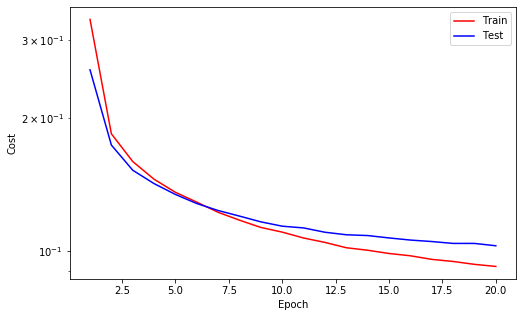



Epoch    21
Train_cost  = 0.0907 | Test_cost  = 0.1022 | 




Epoch    22
Train_cost  = 0.0898 | Test_cost  = 0.1019 | 




Epoch    23
Train_cost  = 0.0894 | Test_cost  = 0.1012 | 




Epoch    24
Train_cost  = 0.0886 | Test_cost  = 0.1013 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1012




Epoch    25
Train_cost  = 0.0872 | Test_cost  = 0.1004 | 




Epoch    26
Train_cost  = 0.0866 | Test_cost  = 0.0998 | 




Epoch    27
Train_cost  = 0.0866 | Test_cost  = 0.1013 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0998




Epoch    28
Train_cost  = 0.0863 | Test_cost  = 0.1013 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0998




Epoch    29
Train_cost  = 0.0855 | Test_cost  = 0.1002 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0998




Epoch    30
Train_cost  = 0.0853 | Test_cost  = 0.1007 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0998




Epoch    31
Train_cost  = 0.0844 | Test_cost  = 0.0992 | 




Epoch    32
Train_cost  = 0.0839 | Test_cost  = 0.0995 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0992




Epoch    33
Train_cost  = 0.0835 | Test_cost  = 0.0992 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0992




Epoch    34
Train_cost  = 0.0827 | Test_cost  = 0.0996 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0992




Epoch    35
Train_cost  = 0.0822 | Test_cost  = 0.0987 | 




Epoch    36
Train_cost  = 0.0817 | Test_cost  = 0.0981 | 




Epoch    37
Train_cost  = 0.0816 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0981




Epoch    38
Train_cost  = 0.0811 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0981




Epoch    39
Train_cost  = 0.0806 | Test_cost  = 0.0977 | 




Epoch    40
Train_cost  = 0.0798 | Test_cost  = 0.0985 | 


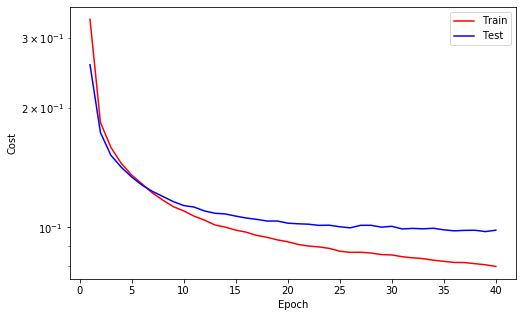

==> EarlyStop patience =  1 | Best test_cost: 0.0977




Epoch    41
Train_cost  = 0.0798 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0977




Epoch    42
Train_cost  = 0.0796 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0977




Epoch    43
Train_cost  = 0.0793 | Test_cost  = 0.0974 | 




Epoch    44
Train_cost  = 0.0788 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  1 | Best test_cost: 0.0974




Epoch    45
Train_cost  = 0.0795 | Test_cost  = 0.0978 | 
==> EarlyStop patience =  2 | Best test_cost: 0.0974




Epoch    46
Train_cost  = 0.0783 | Test_cost  = 0.0980 | 
==> EarlyStop patience =  3 | Best test_cost: 0.0974




Epoch    47
Train_cost  = 0.0788 | Test_cost  = 0.0984 | 
==> EarlyStop patience =  4 | Best test_cost: 0.0974




Epoch    48
Train_cost  = 0.0783 | Test_cost  = 0.0981 | 
==> EarlyStop patience =  5 | Best test_cost: 0.0974
==> Execute Early Stopping at epoch: 48 | Best test_cost: 0.0974
==> Best model is saved at model/ae


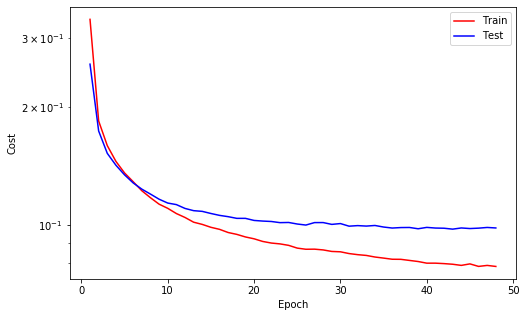

In [26]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Evaluate

In [27]:
feature, target = next(iter(testloader))
feature = feature.view(-1,784).to(device)

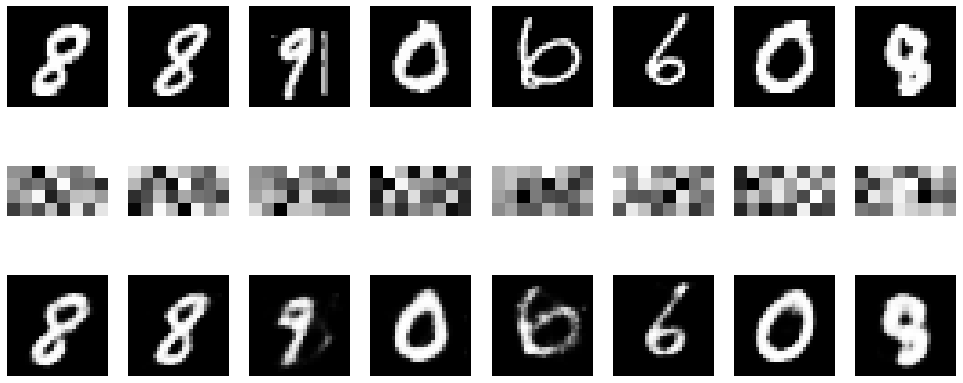

In [29]:
with torch.no_grad():
    model.eval()
    
    enc = model.encode(feature)
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3,8, figsize=(17,7))
for i in range(8):
    ax[0 , i].imshow(feature[i].view(28,28).cpu(), cmap = 'gray')
    ax[0 , i].axis('off');
    
    ax[1 , i].imshow(enc[i].view(4,8).cpu(), cmap = 'gray')
    ax[1 , i].axis('off');
    
    ax[2 , i].imshow(dec[i].view(28,28).cpu(), cmap = 'gray')
    ax[2 , i].axis('off');

# Playground

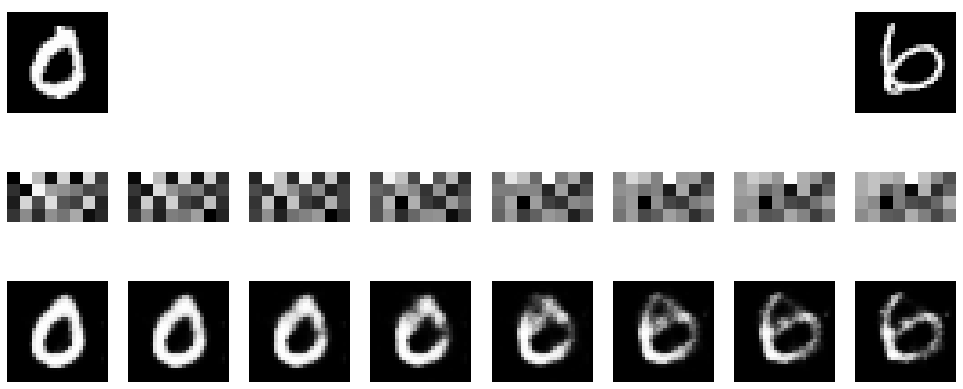

In [36]:
with torch.no_grad():
    model.eval()
    enc = model.encode(feature)
    
    code1, code2 = enc[3], enc[4]
    codes = [(1-i)*code1 + i*code2 for i in np.linspace(0,1,8)]
    enc = torch.stack(codes)
    
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3,8, figsize=(17,7))

ax[0, 0].imshow(feature[3].view(28,28).cpu(), cmap='gray')
ax[0, 7].imshow(feature[4].view(28,28).cpu(), cmap='gray')

for i in range(8):
    ax[0 , i].axis('off');
    
    ax[1 , i].imshow(enc[i].view(4,8).cpu(), cmap = 'gray')
    ax[1 , i].axis('off');
    
    ax[2 , i].imshow(dec[i].view(28,28).cpu(), cmap = 'gray')
    ax[2 , i].axis('off');

# Denoising AutoEncoder

In [48]:
def add_noise(images, noise_factor=0.5):
    images = torch.clone(images)
    images += noise_factor * torch.rand_like(images)
    images = images.clamp(0. , 1.)
    return images

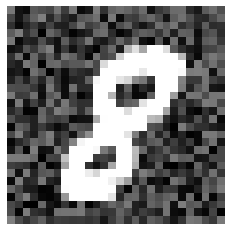

In [52]:
plt.imshow(add_noise(feature[0]).view(28,28).cpu(), cmap= 'gray')
plt.axis('off');

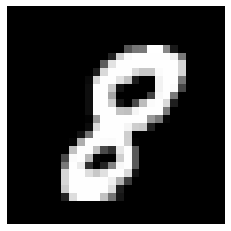

In [53]:
plt.imshow(feature[0].view(28,28).cpu(), cmap= 'gray')
plt.axis('off');

# Training Preparation -> MCOC

In [64]:
model = AutoEncoder(config.z_size)
criterion = nn.BCELoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir="model/dinoising")

# Training

### Inputnya ditambahkan noise, targetnya tetap bersih

In [65]:
from tqdm.auto import tqdm

def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == "train":
        model.train()
    elif mode == "test":
        model.eval()
    cost = 0
    for feature, _ in tqdm(dataloader, desc=mode.title()):
        feature = feature.view(-1,784).to(device)
        output = model(add_noise(feature))
        loss = criterion(output, feature)
        
        if mode == "train":
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        
        cost += loss.item() * feature.shape[0]
    cost = cost / len(dataset)
    return cost



Epoch     1
Train_cost  = 0.3395 | Test_cost  = 0.2650 | 




Epoch     2
Train_cost  = 0.1874 | Test_cost  = 0.1780 | 




Epoch     3
Train_cost  = 0.1637 | Test_cost  = 0.1564 | 




Epoch     4
Train_cost  = 0.1497 | Test_cost  = 0.1459 | 




Epoch     5
Train_cost  = 0.1410 | Test_cost  = 0.1392 | 




Epoch     6
Train_cost  = 0.1339 | Test_cost  = 0.1343 | 




Epoch     7
Train_cost  = 0.1276 | Test_cost  = 0.1295 | 




Epoch     8
Train_cost  = 0.1237 | Test_cost  = 0.1259 | 




Epoch     9
Train_cost  = 0.1201 | Test_cost  = 0.1236 | 




Epoch    10
Train_cost  = 0.1165 | Test_cost  = 0.1211 | 




Epoch    11
Train_cost  = 0.1135 | Test_cost  = 0.1188 | 




Epoch    12
Train_cost  = 0.1116 | Test_cost  = 0.1167 | 




Epoch    13
Train_cost  = 0.1091 | Test_cost  = 0.1155 | 




Epoch    14
Train_cost  = 0.1071 | Test_cost  = 0.1142 | 




Epoch    15
Train_cost  = 0.1050 | Test_cost  = 0.1130 | 




Epoch    16
Train_cost  = 0.1032 | Test_cost  = 0.1140 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1130




Epoch    17
Train_cost  = 0.1020 | Test_cost  = 0.1107 | 




Epoch    18
Train_cost  = 0.1010 | Test_cost  = 0.1097 | 




Epoch    19
Train_cost  = 0.1001 | Test_cost  = 0.1090 | 




Epoch    20
Train_cost  = 0.0987 | Test_cost  = 0.1097 | 


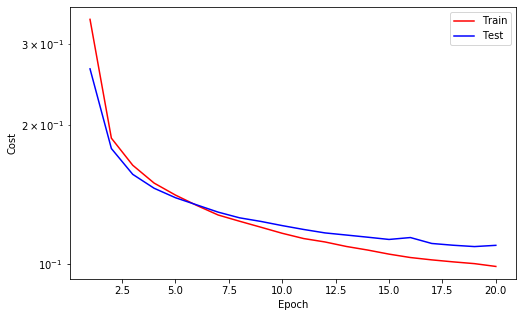

==> EarlyStop patience =  1 | Best test_cost: 0.1090




Epoch    21
Train_cost  = 0.0978 | Test_cost  = 0.1089 | 




Epoch    22
Train_cost  = 0.0966 | Test_cost  = 0.1081 | 




Epoch    23
Train_cost  = 0.0964 | Test_cost  = 0.1079 | 




Epoch    24
Train_cost  = 0.0950 | Test_cost  = 0.1068 | 




Epoch    25
Train_cost  = 0.0946 | Test_cost  = 0.1070 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1068




Epoch    26
Train_cost  = 0.0939 | Test_cost  = 0.1068 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1068




Epoch    27
Train_cost  = 0.0925 | Test_cost  = 0.1067 | 




Epoch    28
Train_cost  = 0.0925 | Test_cost  = 0.1061 | 




Epoch    29
Train_cost  = 0.0926 | Test_cost  = 0.1072 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1061




Epoch    30
Train_cost  = 0.0916 | Test_cost  = 0.1066 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1061




Epoch    31
Train_cost  = 0.0916 | Test_cost  = 0.1071 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1061




Epoch    32
Train_cost  = 0.0898 | Test_cost  = 0.1047 | 




Epoch    33
Train_cost  = 0.0892 | Test_cost  = 0.1051 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1047




Epoch    34
Train_cost  = 0.0885 | Test_cost  = 0.1044 | 




Epoch    35
Train_cost  = 0.0889 | Test_cost  = 0.1046 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1044




Epoch    36
Train_cost  = 0.0893 | Test_cost  = 0.1047 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1044




Epoch    37
Train_cost  = 0.0884 | Test_cost  = 0.1046 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1044




Epoch    38
Train_cost  = 0.0878 | Test_cost  = 0.1044 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1044




Epoch    39
Train_cost  = 0.0874 | Test_cost  = 0.1043 | 




Epoch    40
Train_cost  = 0.0867 | Test_cost  = 0.1043 | 


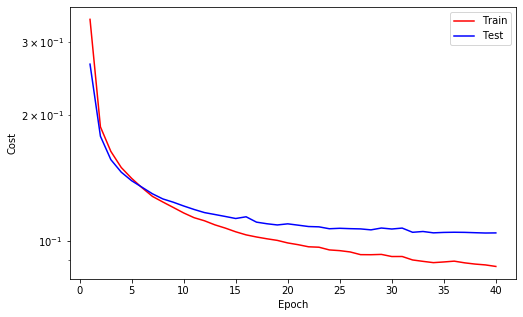

==> EarlyStop patience =  1 | Best test_cost: 0.1043




Epoch    41
Train_cost  = 0.0864 | Test_cost  = 0.1036 | 




Epoch    42
Train_cost  = 0.0861 | Test_cost  = 0.1031 | 




Epoch    43
Train_cost  = 0.0852 | Test_cost  = 0.1034 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1031




Epoch    44
Train_cost  = 0.0854 | Test_cost  = 0.1031 | 




Epoch    45
Train_cost  = 0.0850 | Test_cost  = 0.1032 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1031




Epoch    46
Train_cost  = 0.0849 | Test_cost  = 0.1033 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1031




Epoch    47
Train_cost  = 0.0844 | Test_cost  = 0.1031 | 




Epoch    48
Train_cost  = 0.0842 | Test_cost  = 0.1029 | 




Epoch    49
Train_cost  = 0.0840 | Test_cost  = 0.1030 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1029




Epoch    50
Train_cost  = 0.0843 | Test_cost  = 0.1047 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1029




Epoch    51
Train_cost  = 0.0835 | Test_cost  = 0.1036 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1029




Epoch    52
Train_cost  = 0.0834 | Test_cost  = 0.1034 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1029




Epoch    53
Train_cost  = 0.0828 | Test_cost  = 0.1028 | 




Epoch    54
Train_cost  = 0.0826 | Test_cost  = 0.1038 | 
==> EarlyStop patience =  1 | Best test_cost: 0.1028




Epoch    55
Train_cost  = 0.0826 | Test_cost  = 0.1029 | 
==> EarlyStop patience =  2 | Best test_cost: 0.1028




Epoch    56
Train_cost  = 0.0822 | Test_cost  = 0.1029 | 
==> EarlyStop patience =  3 | Best test_cost: 0.1028




Epoch    57
Train_cost  = 0.0821 | Test_cost  = 0.1031 | 
==> EarlyStop patience =  4 | Best test_cost: 0.1028




Epoch    58
Train_cost  = 0.0823 | Test_cost  = 0.1031 | 
==> EarlyStop patience =  5 | Best test_cost: 0.1028
==> Execute Early Stopping at epoch: 58 | Best test_cost: 0.1028
==> Best model is saved at model/dinoising


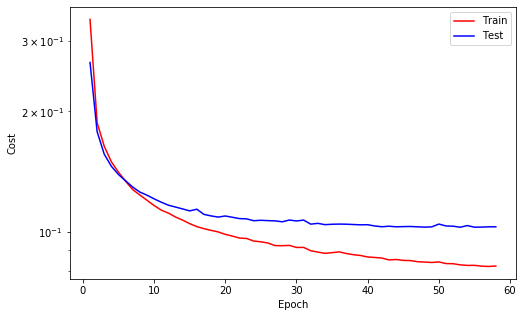

In [66]:
while True:
    train_cost = loop_fn("train", train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost = loop_fn("test", test_set, testloader, model, criterion, optimizer, device)
    
    # Logging
    callback.log(train_cost, test_cost)

    # Checkpoint
    callback.save_checkpoint()
        
    # Runtime Plotting
    callback.cost_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor="test_cost"):
        callback.plot_cost()
        break

# Evaluate

In [67]:
feature, target = next(iter(testloader))
feature = add_noise(feature.view(-1,784).to(device))

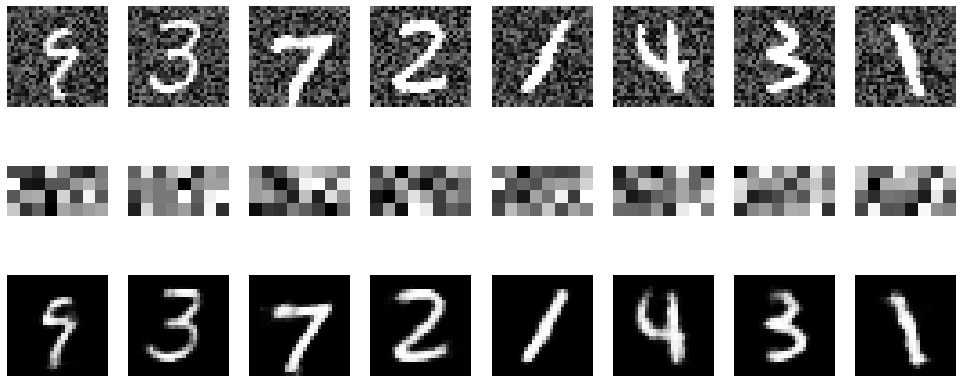

In [68]:
with torch.no_grad():
    model.eval()
    
    enc = model.encode(feature)
    dec = model.decode(enc)
    
fig, ax = plt.subplots(3,8, figsize=(17,7))
for i in range(8):
    ax[0 , i].imshow(feature[i].view(28,28).cpu(), cmap = 'gray')
    ax[0 , i].axis('off');
    
    ax[1 , i].imshow(enc[i].view(4,8).cpu(), cmap = 'gray')
    ax[1 , i].axis('off');
    
    ax[2 , i].imshow(dec[i].view(28,28).cpu(), cmap = 'gray')
    ax[2 , i].axis('off');